# Tree-based (Ensemble) Models and Handling Imbalanced Data [30 points]

For this problem, we will use the wine quality dataset on which the task is a binary classification of whether a given wine is of low or high quality based on different physicochemical features.
 
The dataset consists of a set of physicochemical features as inputs and the target is wine quality stored in the target column, where a value of 1 corresponds to an instance of high quality wine and -1 corresponds to an instance of low quality ones.

### Loading the data (3pts)
Load the data from library.

In [2]:
# Use wine dataset from imlearn
from imblearn.datasets import fetch_datasets
import numpy as np
import pandas as pd

datasets = fetch_datasets()

# Wine quality dataset contains 12 features, descriptions found here: 
# https://archive.ics.uci.edu/ml/datasets/wine+quality
data = datasets['wine_quality']

X, y = data.data, data.target

# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Question:** Draw the class distribution of the dataset. What are possible problems if we train a classification model directly on this dataset?

Percentage of high quality observations 0.03736218864842793


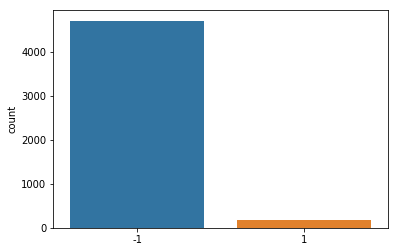

In [11]:
# import libraries for plotting class distribution
import matplotlib.pyplot as plt
import seaborn as sns

high_quality_ratio = len(data.target[data.target==1])/len(data.target)
print('Percentage of high quality observations', high_quality_ratio)

# color coding for 2 classes
colors = ["#0101DF", "#DF0101"]

## code to plot the class distribution. Hint: countplot in seaborn
sns.countplot(data.target)

**Answer:** When classes are imbalanced, we are likely to get suprisingly good accuracy score for any model because it minimizes the error rate by predicting the majority class. However, the model is useless because our goal often is to detect the minority class. So the metric we care about - the recall rate would be low.

### Training and testing a Random Forest classfier directly on the data (3pts)

Let's first train a random forest classifier with default parameters using X_train and y_train and test the performance on the test data.

In [12]:
from sklearn.ensemble import RandomForestClassifier # class for random forest classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

## Instantiate and fit a random forest classifier to the training data
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
## Measure and print out the accuracy and recall
test_acc = accuracy_score(y_test,clf.predict(X_test))

print('Random forest classifier accuray:', test_acc)

test_recall = recall_score(y_test,clf.predict(X_test))

print('Random forest classifier recall:', test_recall)

Random forest classifier accuray: 0.9485714285714286
Random forest classifier recall: 0.09090909090909091


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Quetion:** Compute the recall and accuracy scores of the random forest classifier. How is the gap between the accuracy and recall scores? Provide an explanation.

**Answer:** The accuracy is really high, and the recall rate is really low. There is a huge gap because the model likely predicted the majority class for most of the input. However, recall is the ratio of correctly predicted positive observations to the all observations in actual class. (https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/) The model is not sensitive in picking out the high quality wines that we care about.

### Data balancing via Smote (6pts)

In [21]:
from imblearn.over_sampling import SMOTE #Over sampling
import numpy as np

## Instantiate smote and balance training data only
smote = SMOTE()
X_res,y_res = smote.fit_resample(X_train,y_train)
## Compute and print percentage of high quality wine after balancing
percentage = len(y_res[y_res == 1])/len(y_res)
print('Percentage of high quality counts in the balanced data:{}%'.format(percentage))

Percentage of high quality counts in the balanced data:0.5%


**Question:** Plot the distribution of balanced training data.

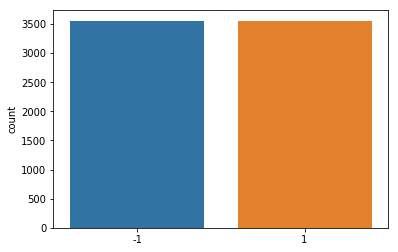

In [22]:
colors = ["#0101DF", "#DF0101"]
## plot the class distribution of training data after balanced
sns.countplot(y_res)

Let's retrain and test our random forest model on the balanced training data

In [23]:

## Instantiate random forest and train on balanced training data
clf = RandomForestClassifier()
clf.fit(X_res,y_res)
test_acc = accuracy_score(y_test,clf.predict(X_test))

print('Random forest classifier accuray:', test_acc)

test_recall = recall_score(y_test,clf.predict(X_test))

print('Random forest classifier recall:', test_recall)

Random forest classifier accuray: 0.9395918367346939
Random forest classifier recall: 0.25757575757575757


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Question:** Compute the recall and accuracy scores of the new random forest classifier. How do the accuracy and recall change compared to those without data balancing?

**Answer:** The recall rate is almost 3 times higher as accuracy remains high. However the value of recall is still low. Since now we have a balanced dataset, we should switch the focus to tweaking the model.

### Control complexity of the model (18pts)

#### Control the depth of decision trees in our ensemble (6pts)
By default, the decision trees in random forest are expanded until all leaves are pure or until all leaves contain less than a certain number set by min_samples_split parameter. Let's try a fixed maximum depth that the tree can expand.

In [24]:
## Instantiate model with max depth trees being 3
clf = RandomForestClassifier(max_depth = 3)
clf.fit(X_res,y_res)

test_acc = accuracy_score(y_test,clf.predict(X_test))

print('Random forest classifier accuray:', test_acc)

test_recall = recall_score(y_test,clf.predict(X_test))

print('Random forest classifier recall:', test_recall)

Random forest classifier accuray: 0.8130612244897959
Random forest classifier recall: 0.5454545454545454


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Question:** Compute the recall and accuracy scores of the new random forest classifier. How do the accuracy and recall change compared to those in the default parameter case?

**Answer:** After we limited the max_depth, the accuracy was lower by about 12%, as the recall went up by about 100%.

#### Choose the number of trees in the forest (6pts)
By default, we use 10 random trees. Let's increase this number to 100

In [25]:
## Instantiate model with max depth of 3 and 100 decision trees

clf = RandomForestClassifier(max_depth = 3,n_estimators = 100)
clf.fit(X_res,y_res)

test_acc = accuracy_score(y_test,clf.predict(X_test))

print('Random forest classifier accuray:', test_acc)

test_recall = recall_score(y_test,clf.predict(X_test))

print('Random forest classifier recall:', test_recall)

Random forest classifier accuray: 0.833469387755102
Random forest classifier recall: 0.5909090909090909


**Question:** Compute the recall and accuracy scores of the random forest classifier. How do the accuracy and recall change compared to those with 10 trees? What do the results imply about increasing the number of trees?

**Answer:** Both accuracy and recall went up. Since random forest is essencially bagging, having more trees means the ensembled model taking average over more randomized trees, so it performs better.

#### Tree pruning by min_impurity_decrease (6pts)
By default, the tree keeps expanding until the impurity is 0. However, we can specify a minimum impurity decrease amount under which nodes in the tree stop branching. RandomForestClassifier in sklearn use min_impurity_decrease for setting this threshold. Let's try that on our problem.

In [34]:
## Instantiate model with min impurity decrease of 0.001

clf = RandomForestClassifier(max_depth = 3,n_estimators = 100,min_impurity_decrease = 0.001)
clf.fit(X_res,y_res)

test_acc = accuracy_score(y_test,clf.predict(X_test))

print('Random forest classifier accuracy:', test_acc)

test_recall = recall_score(y_test,clf.predict(X_test))

print('Random forest classifier recall:', test_recall)

Random forest classifier accuracy: 0.843265306122449
Random forest classifier recall: 0.5909090909090909


**Question:** Compute the recall and accuracy scores of the random forest classifier. How does the recall change compared to those with 10 trees and max_depth = 3?

**Answer:** The accurcay and recall didn't change much when we specify a minimum impurity decrease. This might be because the threshold is still close to 0, or setting up max_depth already prevents the trees branching out too deep.